## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [1]:
student_name = "jyothi byregowda"
student_id = "47825960"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#### 1.Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.

In [3]:
df = pd.read_csv("portfolio_3dataset.csv")

In [4]:
df.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


In [5]:
# to check the shape of the dataset

df.shape

(2685, 11)

The dataset has 2685 rows and 11 column

In [6]:
# summary of the data

df.describe()

,userId,timestamp,helpfulness,item_id,item_price,user_city,rating
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.908007,43.478585,83.091650,19.456983,0.639851
std,3517.893437,37013.726118,0.289069,26.630426,42.227558,11.397281,0.480133
min,4.000000,10100.000000,3.000000,0.000000,12.000000,0.000000,0.000000
25%,1310.000000,22000.000000,4.000000,21.000000,49.000000,9.000000,0.000000
50%,4666.000000,52800.000000,4.000000,42.000000,73.650000,19.000000,1.000000
75%,7651.000000,91000.000000,4.000000,67.000000,129.820000,28.000000,1.000000
max,10779.000000,123199.000000,4.000000,88.000000,149.000000,39.000000,1.000000


In [7]:
# to check the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


1. review,item,gender and category has categorical value and all other remaining coloumn has numerical value

In [8]:
# to extract object data type columns.

a=df.dtypes.index[df.dtypes=='object']
df[a].describe() 

,review,item,gender,category
count,2685,2685,2685,2685
unique,2675,82,2,9
top,Being John Malkovich,AOL (America Online),M,Movies
freq,3,93,1407,1190


In [9]:
# to check whether the dataset has any null values

df.isnull().sum()

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64

1. dataset has no null values or duplicated values

#### Handling outliers

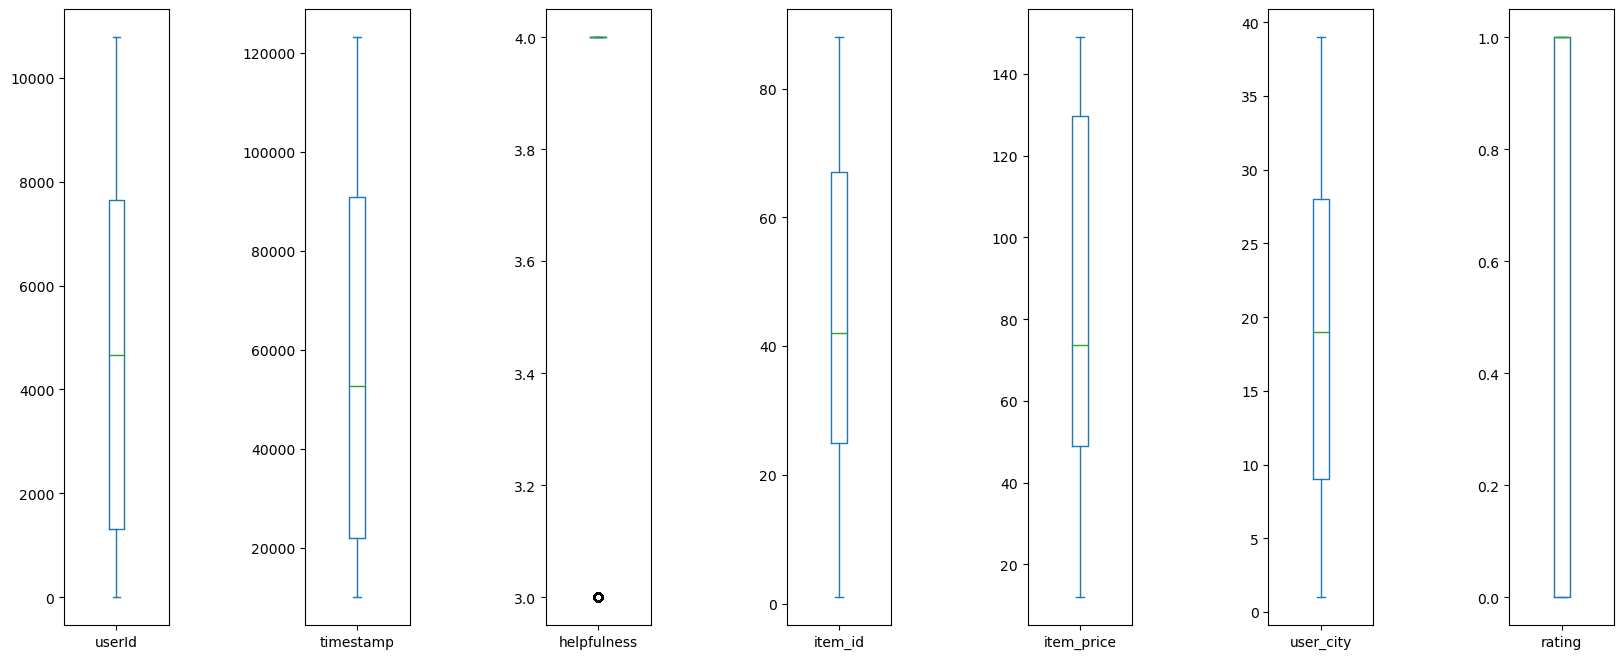

In [63]:
# identifying outliers using box plot

df.plot(kind='box',subplots=True,figsize=(20, 8))

# increase spacing between subplots

plt.subplots_adjust(wspace=1.3) 
plt.show()

from the boxplot we can say only helpfulness column has outlier.

<Axes: xlabel='helpfulness', ylabel='Count'>

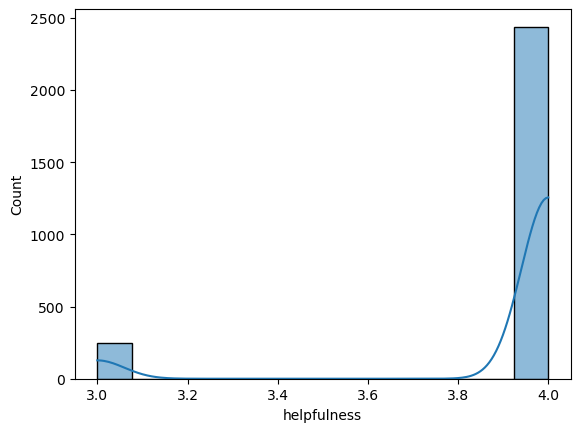

In [11]:
import seaborn as sns
sns.histplot(data=df, x="helpfulness", kde=True)

In [12]:
# helpfulness column has outlier 

Q1 = df['helpfulness'].quantile(0.25)
Q3 = df['helpfulness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
df_clean = df.drop(df.index[(df.helpfulness<lower_bound)|(df.helpfulness>upper_bound)])

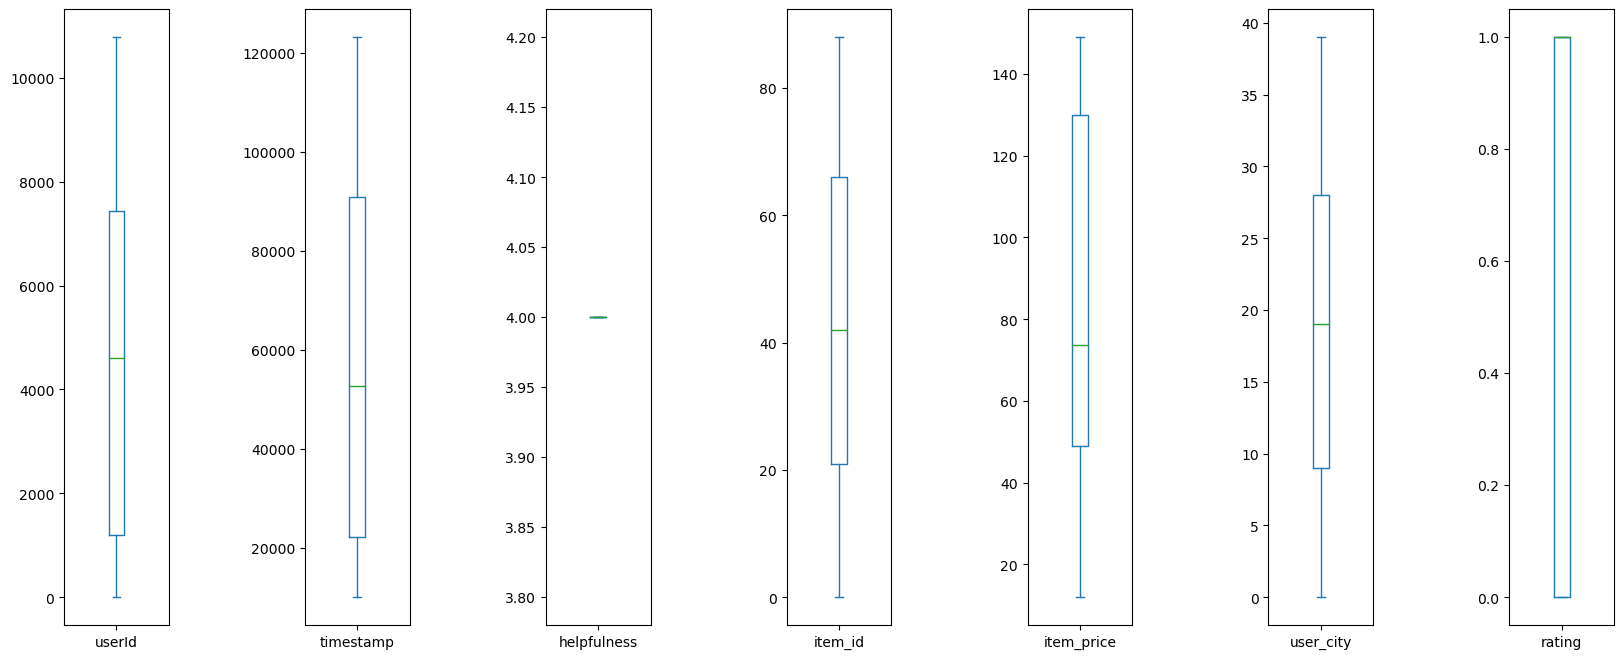

In [14]:
# identifying outliers using box plot
df_clean.plot(kind='box',subplots=True,figsize=(20, 8))

# increase spacing between subplots
plt.subplots_adjust(wspace=1.3) 
plt.show()

#### Handling zero values

In [15]:
df.loc[:, (df == 0).any()]

,item_id,user_city,rating
0,41,4,1
1,74,4,0
2,84,4,1
3,68,4,1
4,6,4,0
...,...,...,...
2680,9,5,1
2681,50,5,1
2682,26,5,1
2683,79,5,1


In [16]:
print("zero's in item_id:",(df['item_id'] == 0).sum())
print("zero's in user_city:",(df['user_city'] == 0).sum())


zero's in item_id: 93
zero's in user_city: 31


item_id, user_city and rating column has zero values. Since rating is our target variable we will replace zeros only in item_id and user_city with median

In [17]:
df.item_id = df.item_id.replace(0, df.item_id.median())
df.user_city = df.user_city.replace(0, df.user_city.median())

In [18]:
print("zero's in item_id:",(df['item_id'] == 0).sum())
print("zero's in user_city:",(df['user_city'] == 0).sum())


zero's in item_id: 0
zero's in user_city: 0


In [19]:
df.loc[:, (df == 0).any()]

,rating
0,1
1,0
2,1
3,1
4,0
...,...
2680,1
2681,1
2682,1
2683,1


#### 2. Converting categorical values into numerical values using ordinal encoder

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_clean[['review','item','gender','category']] = ord_enc.fit_transform(df_clean[['review','item','gender','category']])
df_clean

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
1,4081,72000,1015.0,67.0,4,1.0,8.0,74,108.30,4,0
2,4081,72000,2000.0,77.0,4,1.0,8.0,84,69.00,4,1
7,4081,101899,731.0,23.0,4,1.0,4.0,25,80.00,4,1
11,4159,22304,834.0,45.0,4,1.0,8.0,50,25.00,10,1
12,4159,60203,232.0,29.0,4,1.0,6.0,32,100.62,10,1
...,...,...,...,...,...,...,...,...,...,...,...
2668,2442,122306,239.0,2.0,4,0.0,6.0,3,129.82,20,0
2669,10779,11700,1991.0,68.0,4,1.0,5.0,75,89.00,14,0
2672,10779,20800,104.0,30.0,4,1.0,5.0,33,140.00,14,1
2673,10779,32100,78.0,4.0,4,1.0,5.0,5,59.00,14,1


C:\Users\Jyothi MB\AppData\Local\Temp\ipykernel_22012\3840667756.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[column])
C:\Users\Jyothi MB\AppData\Local\Temp\ipykernel_22012\3840667756.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[column])
C:\Users\Jyothi MB\AppData

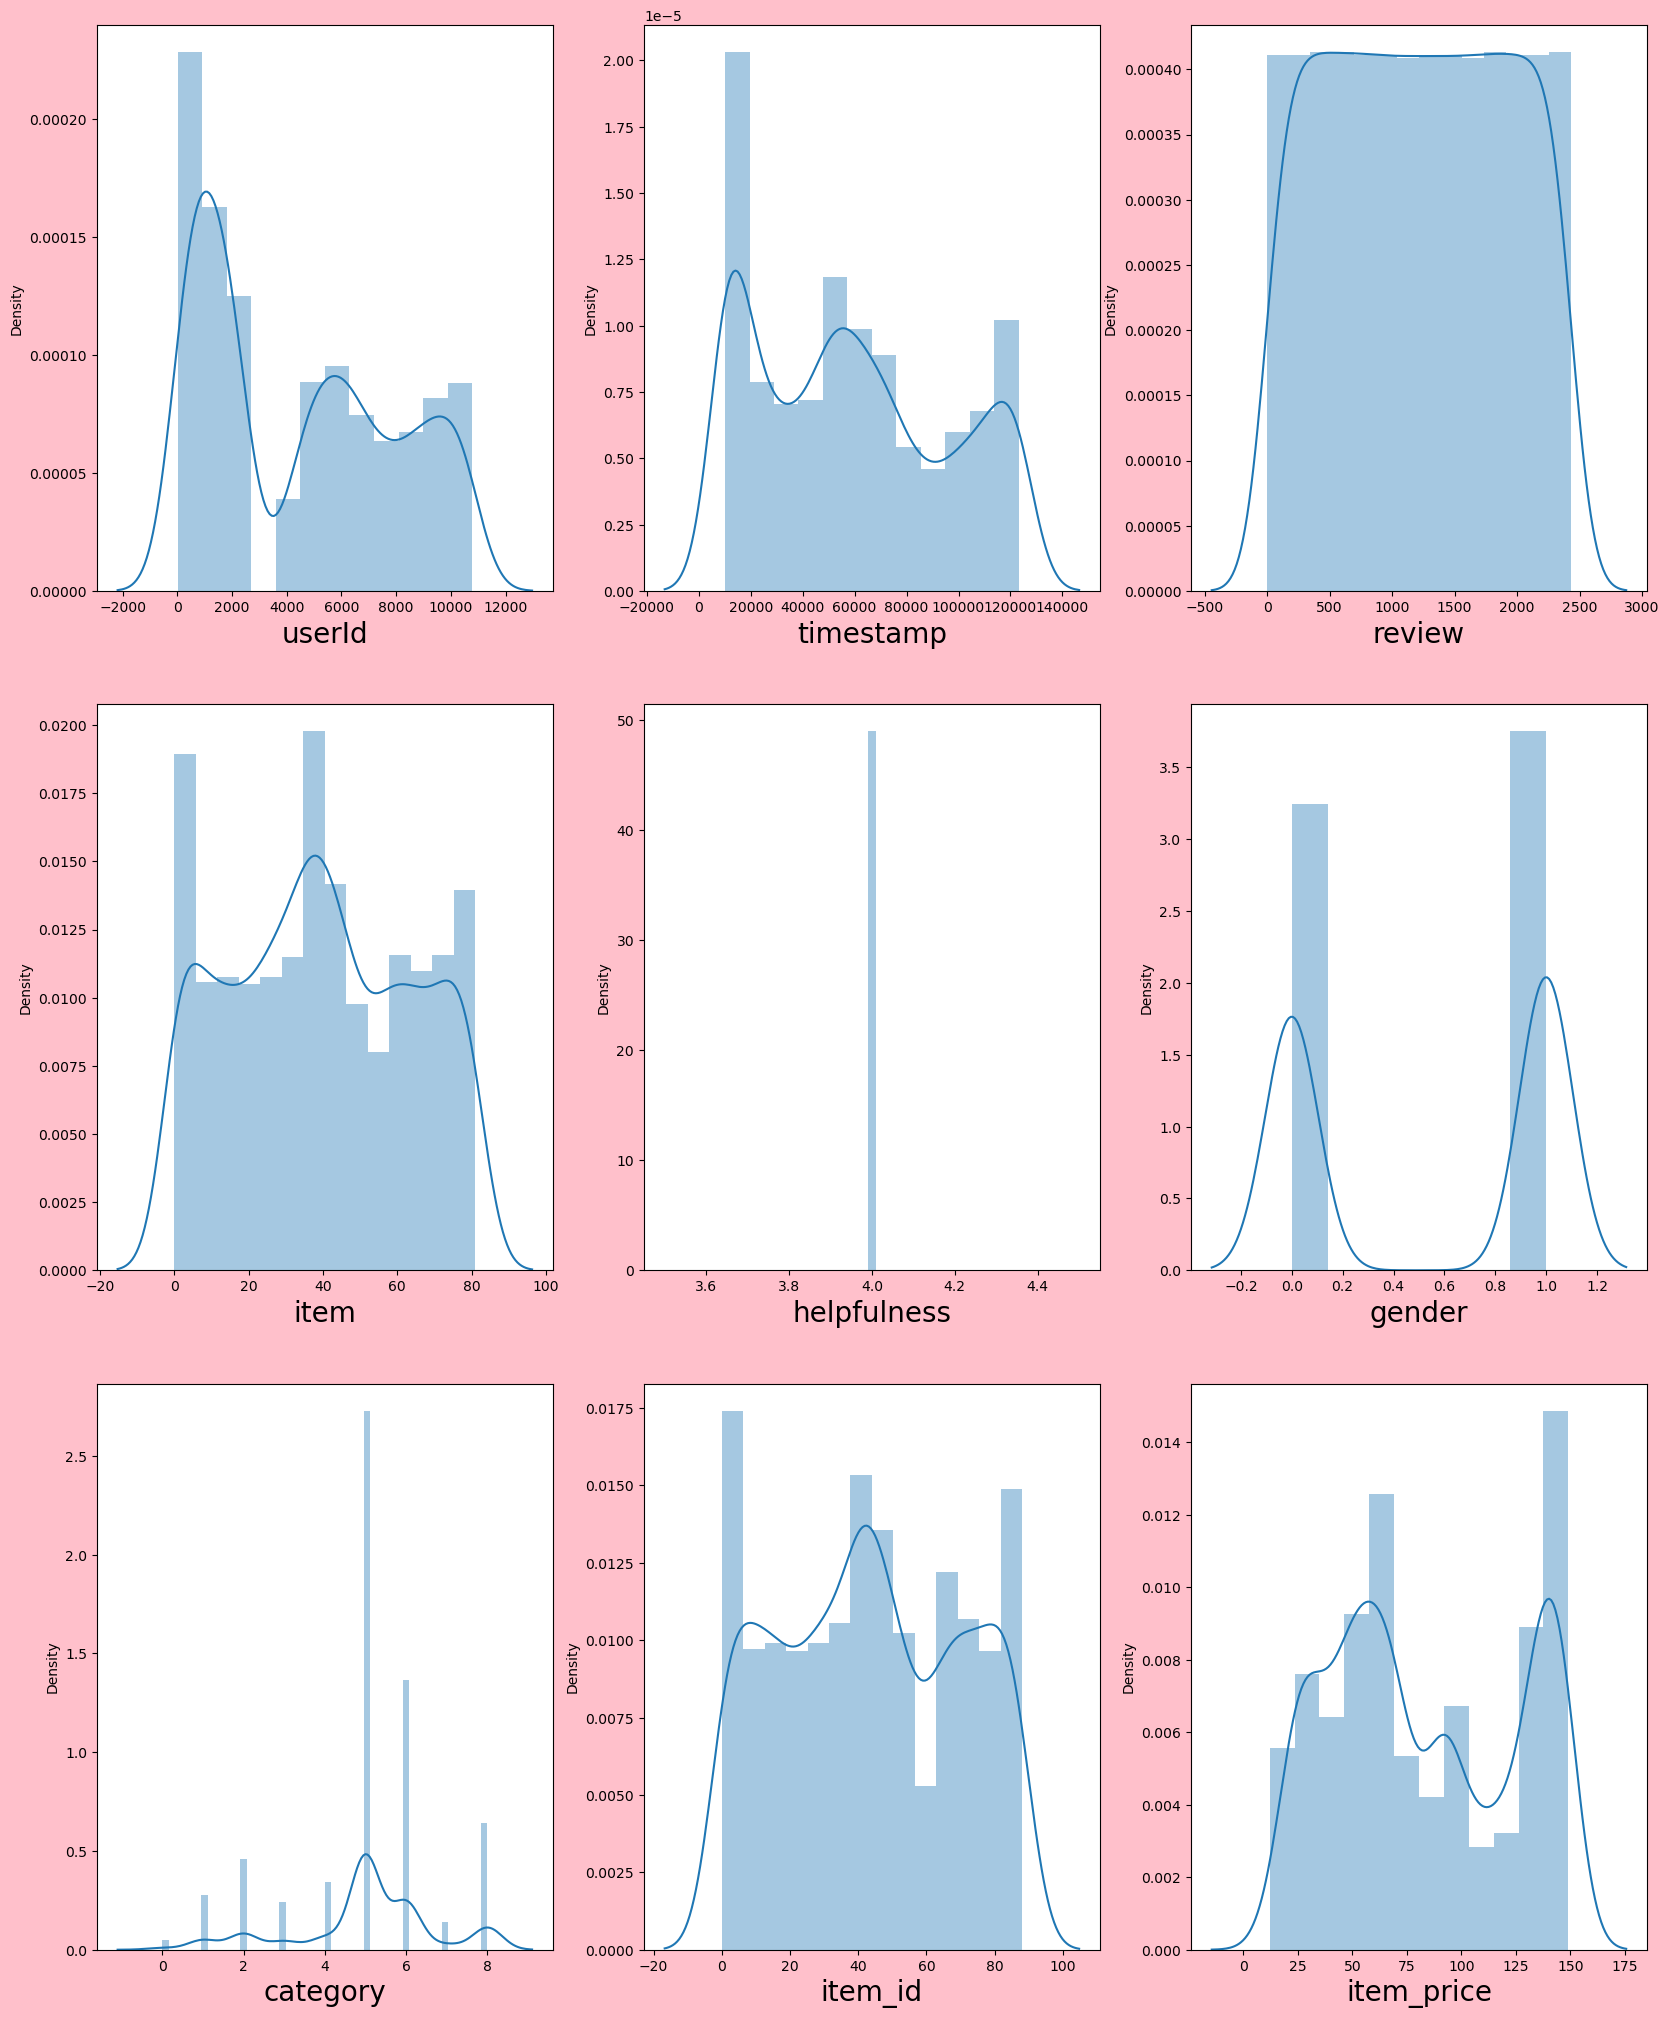

In [21]:
# to check how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber = 1

for column in df_clean:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### 3.Study the correlation between these features.

<Axes: >

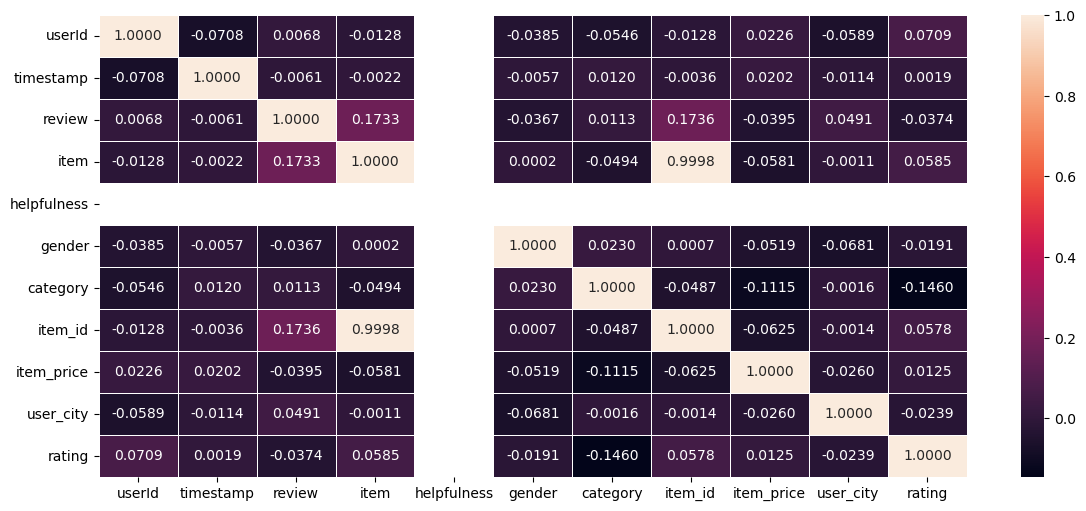

In [22]:
plt.figure(figsize=(14,6))
sns.heatmap(df_clean.corr(),annot=True,fmt=".4f",linewidth=.4)

#### From the heat map we can say 

<ul>
  <li>The most positively correlated feature with rating is item, hence it can be used to build a model</li>
  <li>helpfulness has no correlation with rating, hence it can be dropped.</li>
  <li>The most negatively correlated feature with rating is category, hence it can be used to build a model</li>
  <li>highly correlated columns are item and item_id. There is multicolinearity between these columns. we need to select either of the column while building the model</li>
</ul>

#### 4.Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.

### Logistic Regression

In [23]:
# splitting the data into x(independent variable) and y(dependent variable)

X=df_clean.drop(columns=['helpfulness','item','rating']) 
y=df_clean['rating']

In [24]:
# scaling data 

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [25]:
# splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=144)
print(X_train.shape,X_test.shape)

(1950, 8) (488, 8)


In [26]:
#applying logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
#fitting the data into regression model and calculating score

reg3=logreg.fit(X_train,y_train)
score=reg3.score(X_train,y_train)
print("Accuracy score:",score)

Accuracy score: 0.6512820512820513


Accuracy score of the model is 65.1282%

### Logistic Regression based on feature selection

performing RFE(Recursive Feature Elimation) technique for feature selection,because from correlation it is not clear to select features for model building.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

feature_cols = np.array(['userId','timestamp','review','gender','category','item_id','item_price','user_city'])
X = df_clean[feature_cols]
y = df_clean['rating']
estimator =  LogisticRegression()
for i in range (1,len(X.columns)+1):
    selector = RFE(estimator, n_features_to_select=i)  
    selector = selector.fit(X, y)

    supp = selector.get_support()
    
    x=[]
    for i in feature_cols[supp]:
        x.append(i)
    #print(x)
    X1=df_clean[x]
    y1 = df_clean['rating']
    X1_scaled=scalar.fit_transform(X1)
    X_train,X_test,y_train,y_test = train_test_split(X1_scaled,y1,test_size=0.20,random_state=144)
    
    logreg = LogisticRegression()
    reg3=logreg.fit(X_train,y_train)
    print("features selected:",len(x),':',x)
    print("accuracy score:",reg3.score(X_train,y_train)) 

features selected: 1 : ['category']
accuracy score: 0.6456410256410257
features selected: 2 : ['gender', 'category']
accuracy score: 0.6456410256410257
features selected: 3 : ['gender', 'category', 'user_city']
accuracy score: 0.6471794871794871
features selected: 4 : ['gender', 'category', 'item_id', 'user_city']
accuracy score: 0.6497435897435897
features selected: 5 : ['gender', 'category', 'item_id', 'item_price', 'user_city']
accuracy score: 0.6528205128205128
features selected: 6 : ['userId', 'gender', 'category', 'item_id', 'item_price', 'user_city']
accuracy score: 0.6558974358974359
features selected: 7 : ['userId', 'review', 'gender', 'category', 'item_id', 'item_price', 'user_city']
accuracy score: 0.6538461538461539
features selected: 8 : ['userId', 'timestamp', 'review', 'gender', 'category', 'item_id', 'item_price', 'user_city']
accuracy score: 0.6512820512820513


userId, review, gender, category, item_id, item_price, user_city has the highest acuuracy score of 65.179%



#### 5.Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.

### KNN

In [58]:
# Split data into X(independent variable) and Y(dependent variable)

from sklearn.neighbors import KNeighborsClassifier
X = df_clean.drop(columns = ['rating'])
y = df_clean['rating'] 

In [59]:
# scaling the data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [60]:
## splitting the training and testing data

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [61]:
# to fit the data into KNN model and see how well it perform, K value is selected randomly as 4

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [62]:
# to Predict 

y_prediction = knn.predict(X_test)

from sklearn.metrics import accuracy_score
# Checking Accuracy score
print("The accuaracy score is : ", accuracy_score(y_test,y_prediction))

The accuaracy score is :  0.578688524590164


The accuracy score for k=4 is 57.8688%

### KNN - select k value using GridSearchCV

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset (used Iris dataset)

X = df_clean.drop(columns = ['rating']) 
y = df_clean['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of 'k' values to search through
param_grid = {'n_neighbors': np.arange(1, 31)}  # Adjust the range as needed

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
# 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5) 

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best 'k' value and corresponding accuracy score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best 'k' value: {best_k}")
print(f"Best Accuracy Score: {best_score:.2f}")

# You can now use the best 'k' value for prediction on the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy with Best 'k': {accuracy:.2f}")

Best 'k' value: 23
Best Accuracy Score: 0.61
Test Accuracy with Best 'k': 0.60


#### The accuracy score with k=23 is 60%. The accuracy score has increased when we apply k value by using GridSearchCV method